<a href="https://colab.research.google.com/github/The-Mechanic-3/Data-Driven-Aerospace/blob/Colab/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
try:
    # Try importing the pydmd module
    import pydmd
    print("PyDMD is already installed.")
except ImportError:
    # If the import fails, install the pydmd package
    print("PyDMD is not installed. Installing now...")
    !pip install pydmd
    # Import pydmd after installation
    import pydmd
    print("PyDMD has been successfully installed.")

PyDMD is not installed. Installing now...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 3.2 MB/s eta 0:00:00
PyDMD has been successfully installed.


In [33]:
%matplotlib inline
import numpy as np
import scipy
import scipy.integrate
import warnings
warnings.filterwarnings("ignore")

from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
from pydmd import DMD, BOPDMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing

In [80]:
# To load the data:
npz_filename = "/content/sample_data/spatiotemporal_data.npz"
loaded_data = np.load(npz_filename)
nx = int(loaded_data["nx"])
nt = int(loaded_data["nt"])
x = loaded_data["x"]
t = loaded_data["t"]
xgrid = loaded_data["xgrid"]
tgrid = loaded_data["tgrid"]
dt = float(loaded_data["dt"])
X = loaded_data["X"]
Xn = loaded_data["Xn"]
print(f"Data loaded from {npz_filename}")
print(f"nx = {nx}")
print(f"nt = {nt}")
print(f"dt = {dt}")

Data loaded from /content/sample_data/spatiotemporal_data.npz
nx = 1024
nt = 512
dt = 0.024591723315771374


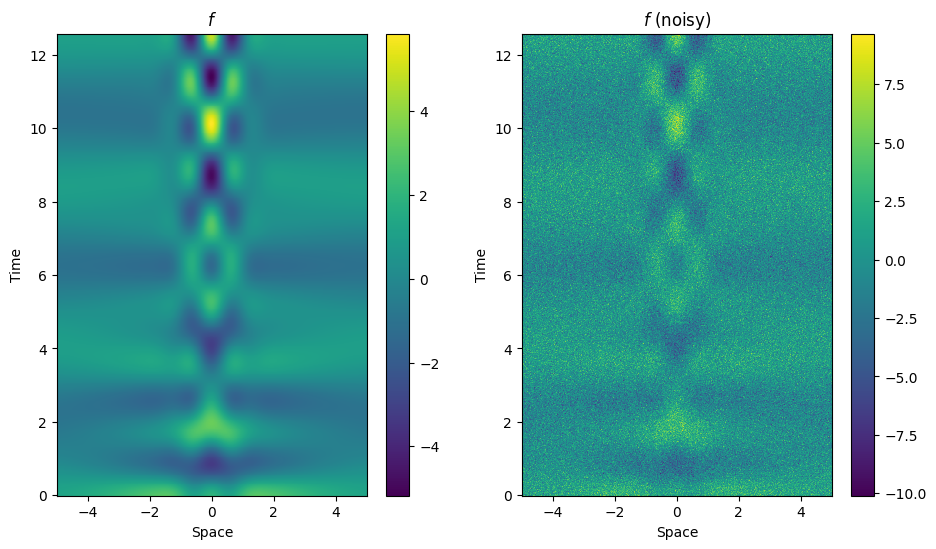

In [81]:
titles = ["$f$", "$f$ (noisy)"]
data = [X, Xn]

fig = plt.figure(figsize=(11,6), dpi=100)
for n, title, d in zip(range(121, 123), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
    plt.xlabel("Space")
    plt.ylabel("Time")
    plt.colorbar()
plt.show()


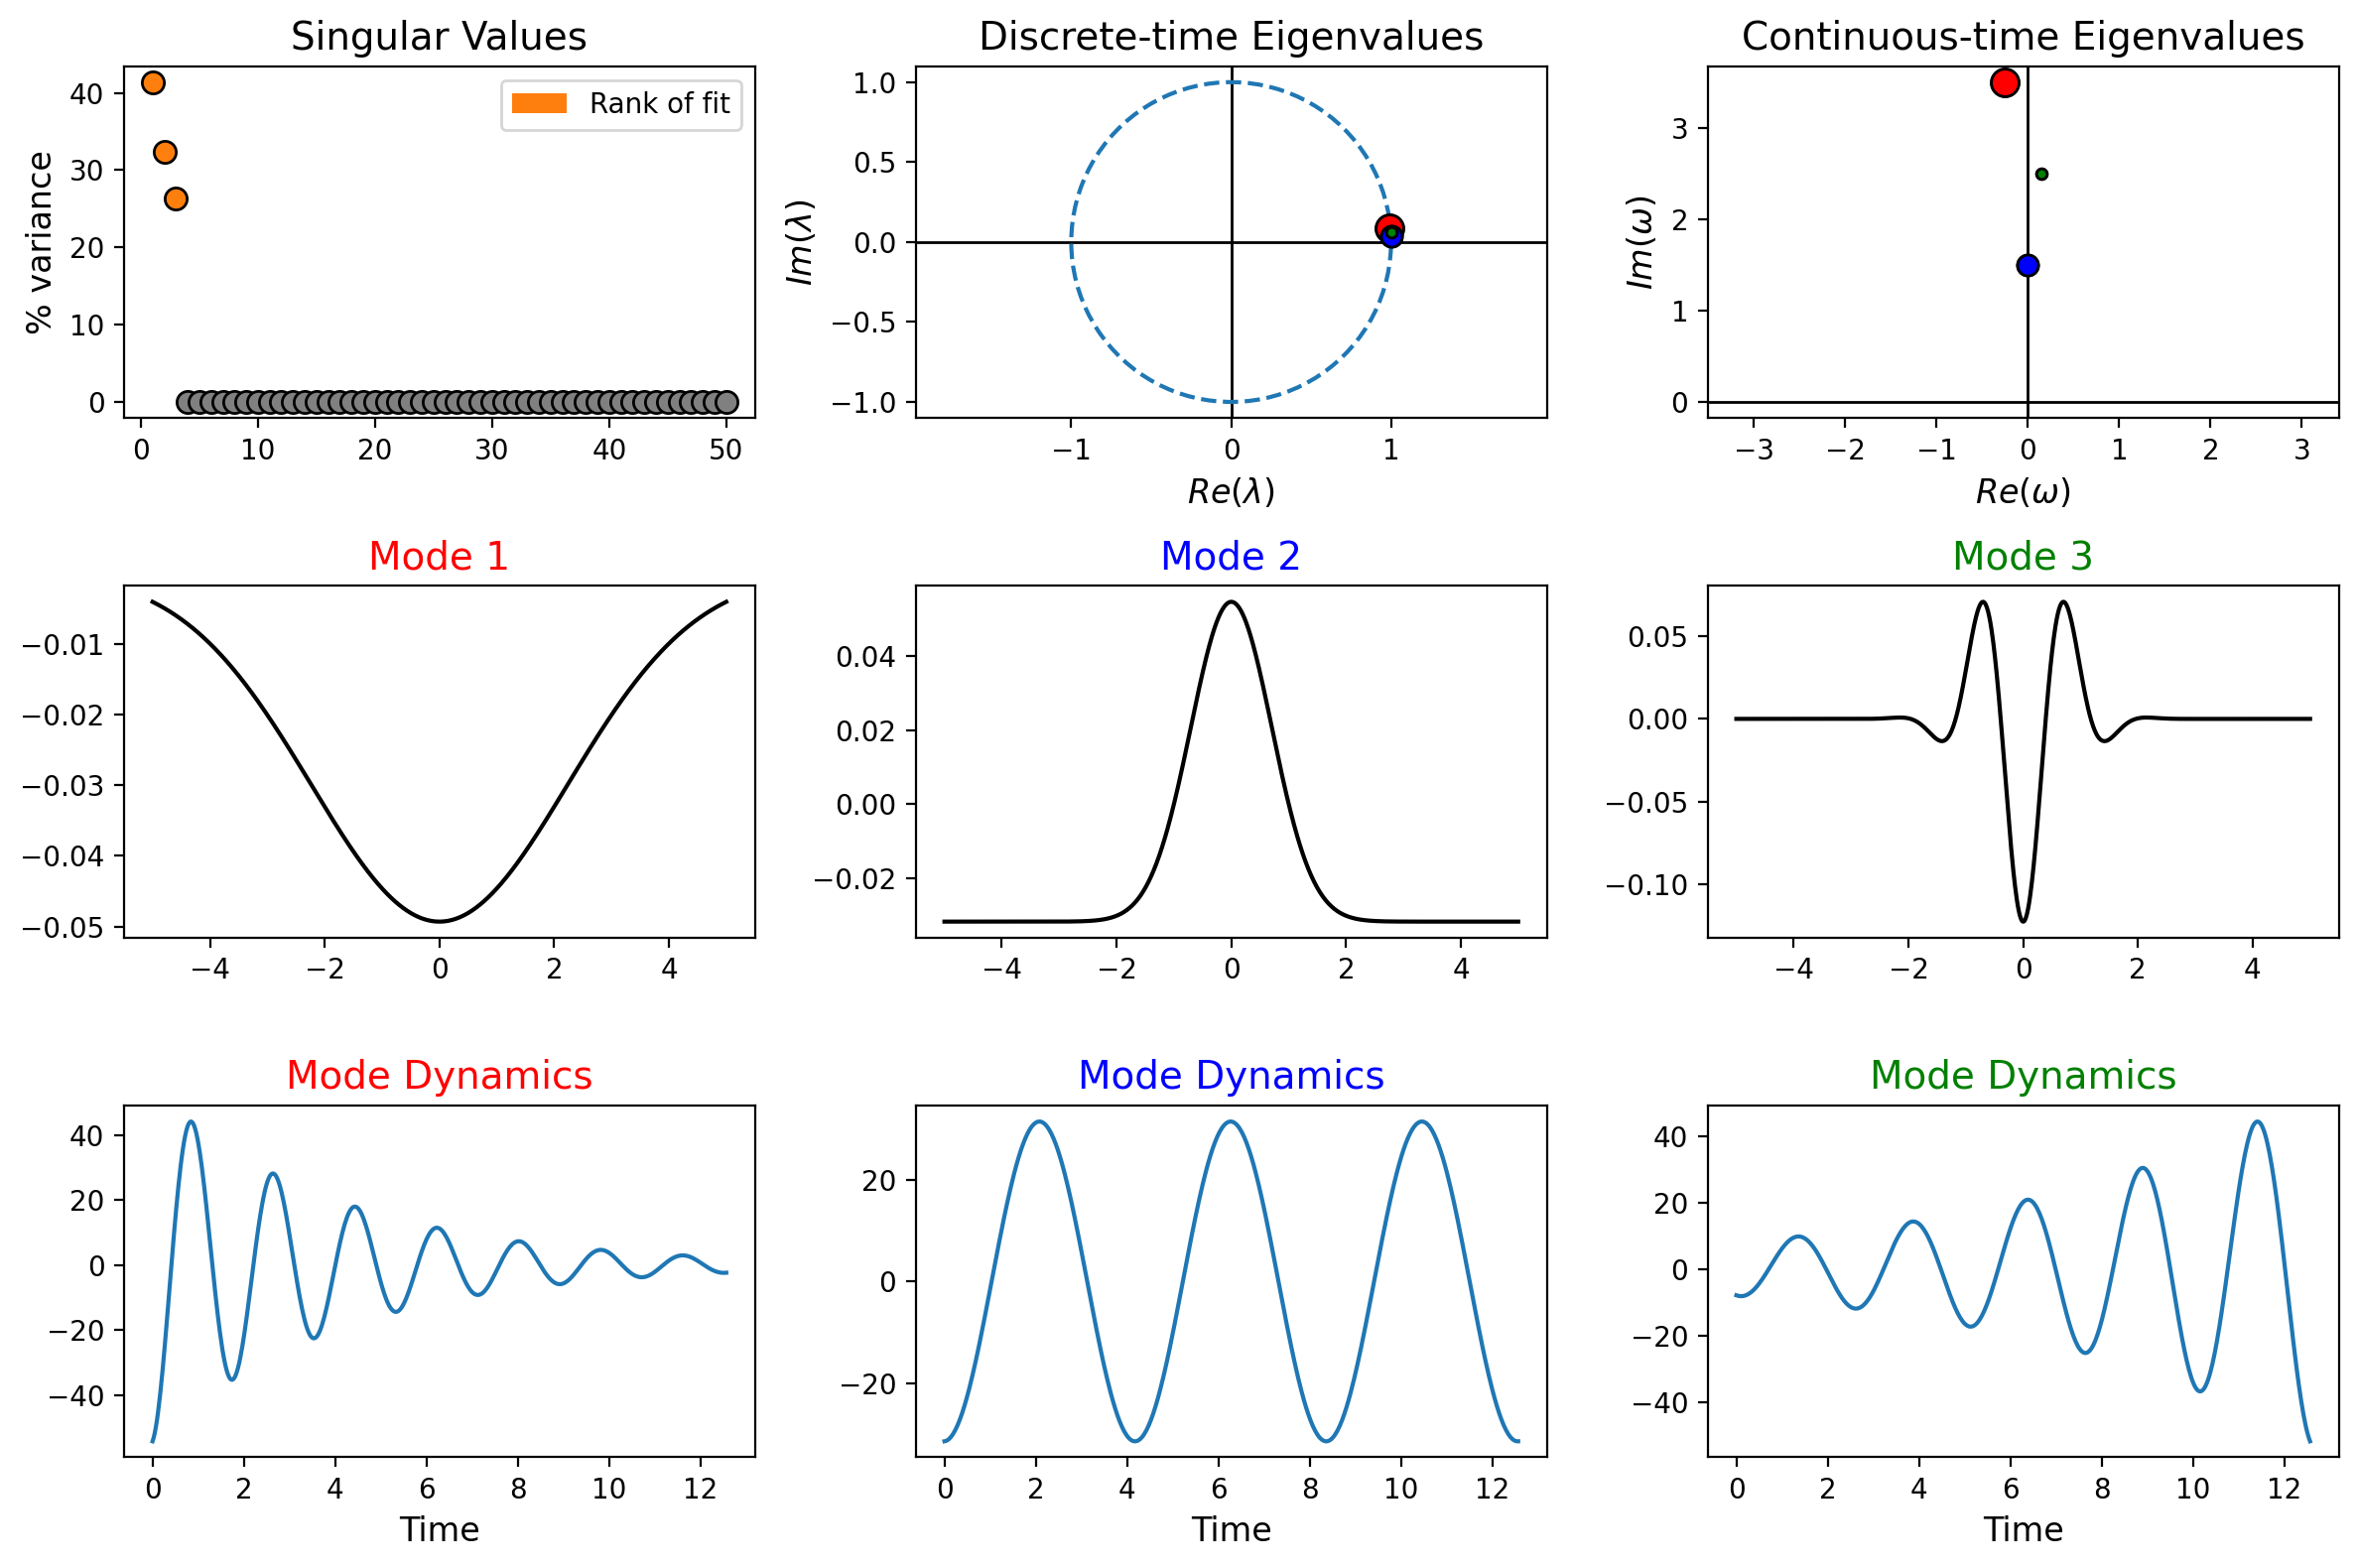

Frequencies (imaginary component):
[ 0.  +1.5j  0.15+2.5j -0.25+3.5j]


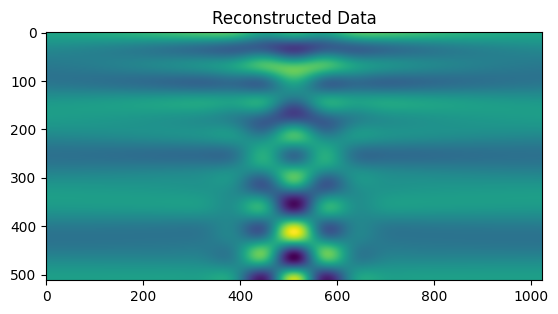

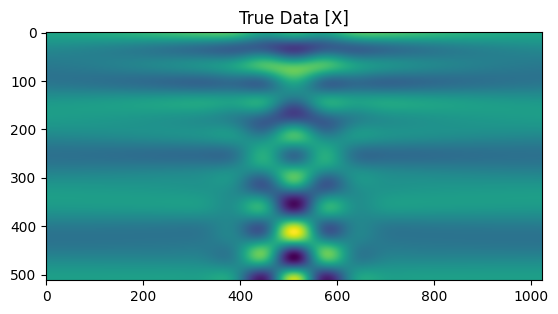

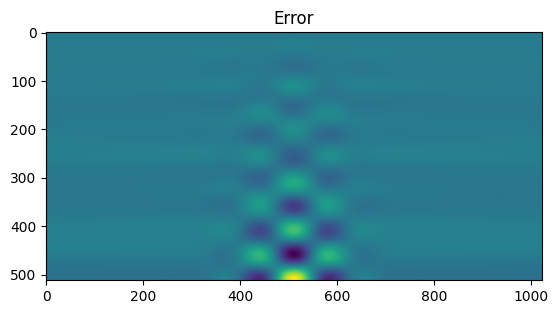

In [82]:
dmd = DMD(svd_rank=3)
dmd.fit(X.T)
plot_summary(dmd, x=x, t=dt)

print(
    f"Frequencies (imaginary component):\n"
    f"{np.round(np.log(dmd.eigs) / dt, decimals=4)}"
)

X_dmd = dmd.reconstructed_data.T  # Reconstructed data from DMD
error = X - X_dmd  # Difference between true and reconstructed data

X_dmd = np.real(X_dmd)
X = np.real(X)
error = np.real(error)

plt.title("Reconstructed Data")
plt.imshow(X_dmd)
plt.show()
plt.title("True Data [X]")
plt.imshow(X)
plt.show()
plt.title("Error")
plt.imshow(error)
plt.show()

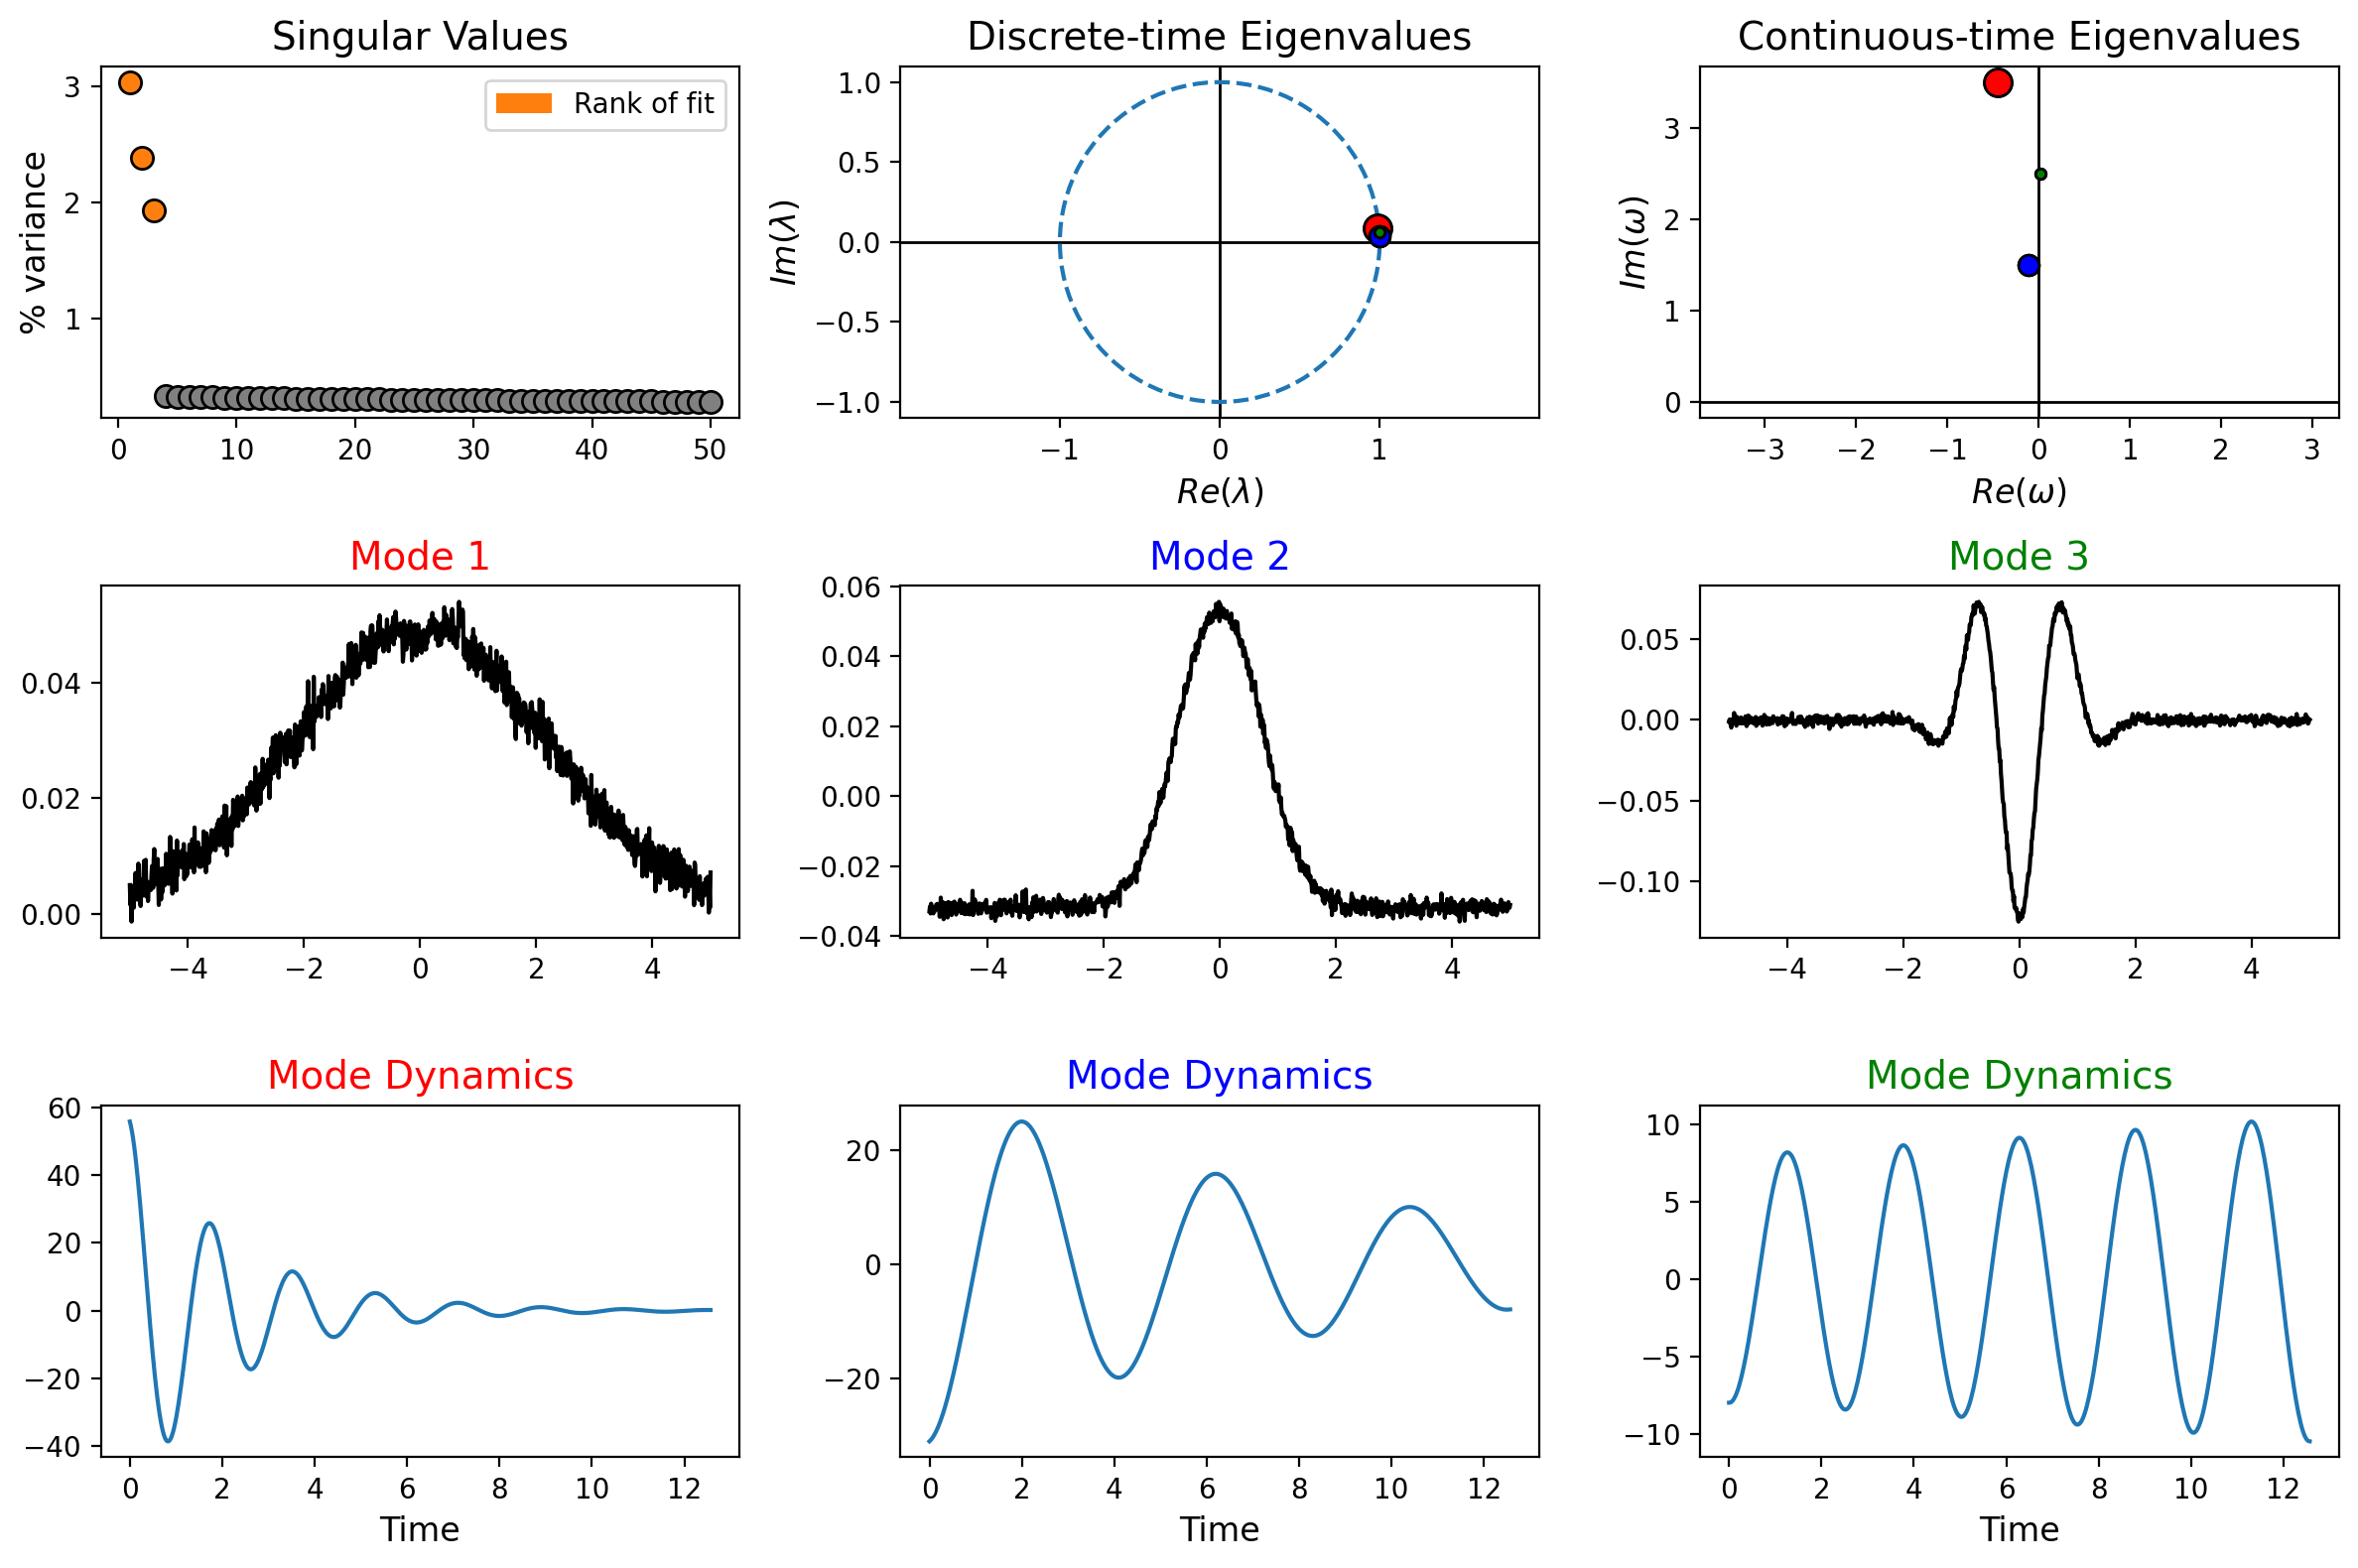

Frequencies (imaginary component):
[-0.1089+1.4964j  0.0217+2.5022j -0.4471+3.504j ]


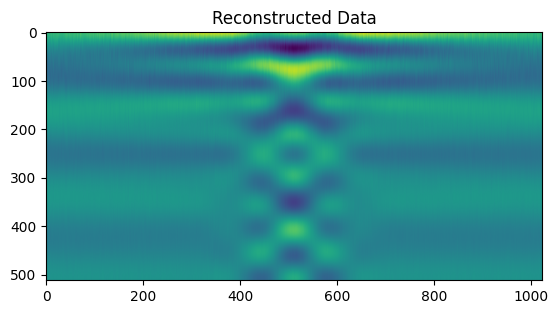

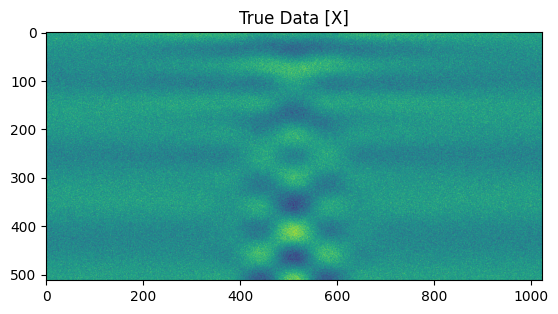

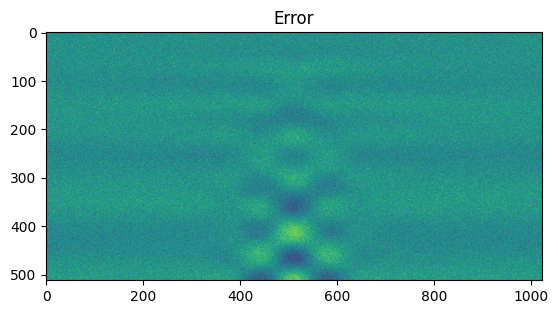

In [83]:
# 5.2
dmd = DMD(svd_rank=3)
dmd.fit(Xn.T)
plot_summary(dmd, x=x, t=dt)

print(
    f"Frequencies (imaginary component):\n"
    f"{np.round(np.log(dmd.eigs) / dt, decimals=4)}"
)

X_dmd_5_2 = dmd.reconstructed_data.T  # Reconstructed data from DMD
error_5_2 = Xn - X_dmd_5_2  # Difference between true and reconstructed data

X_dmd_5_2 = np.real(X_dmd_5_2)
Xn = np.real(Xn)
error_5_2 = np.real(error_5_2)

plt.title("Reconstructed Data")
plt.imshow(X_dmd_5_2)
plt.show()
plt.title("True Data [X]")
plt.imshow(Xn)
plt.show()
plt.title("Error")
plt.imshow(error_5_2)
plt.show()

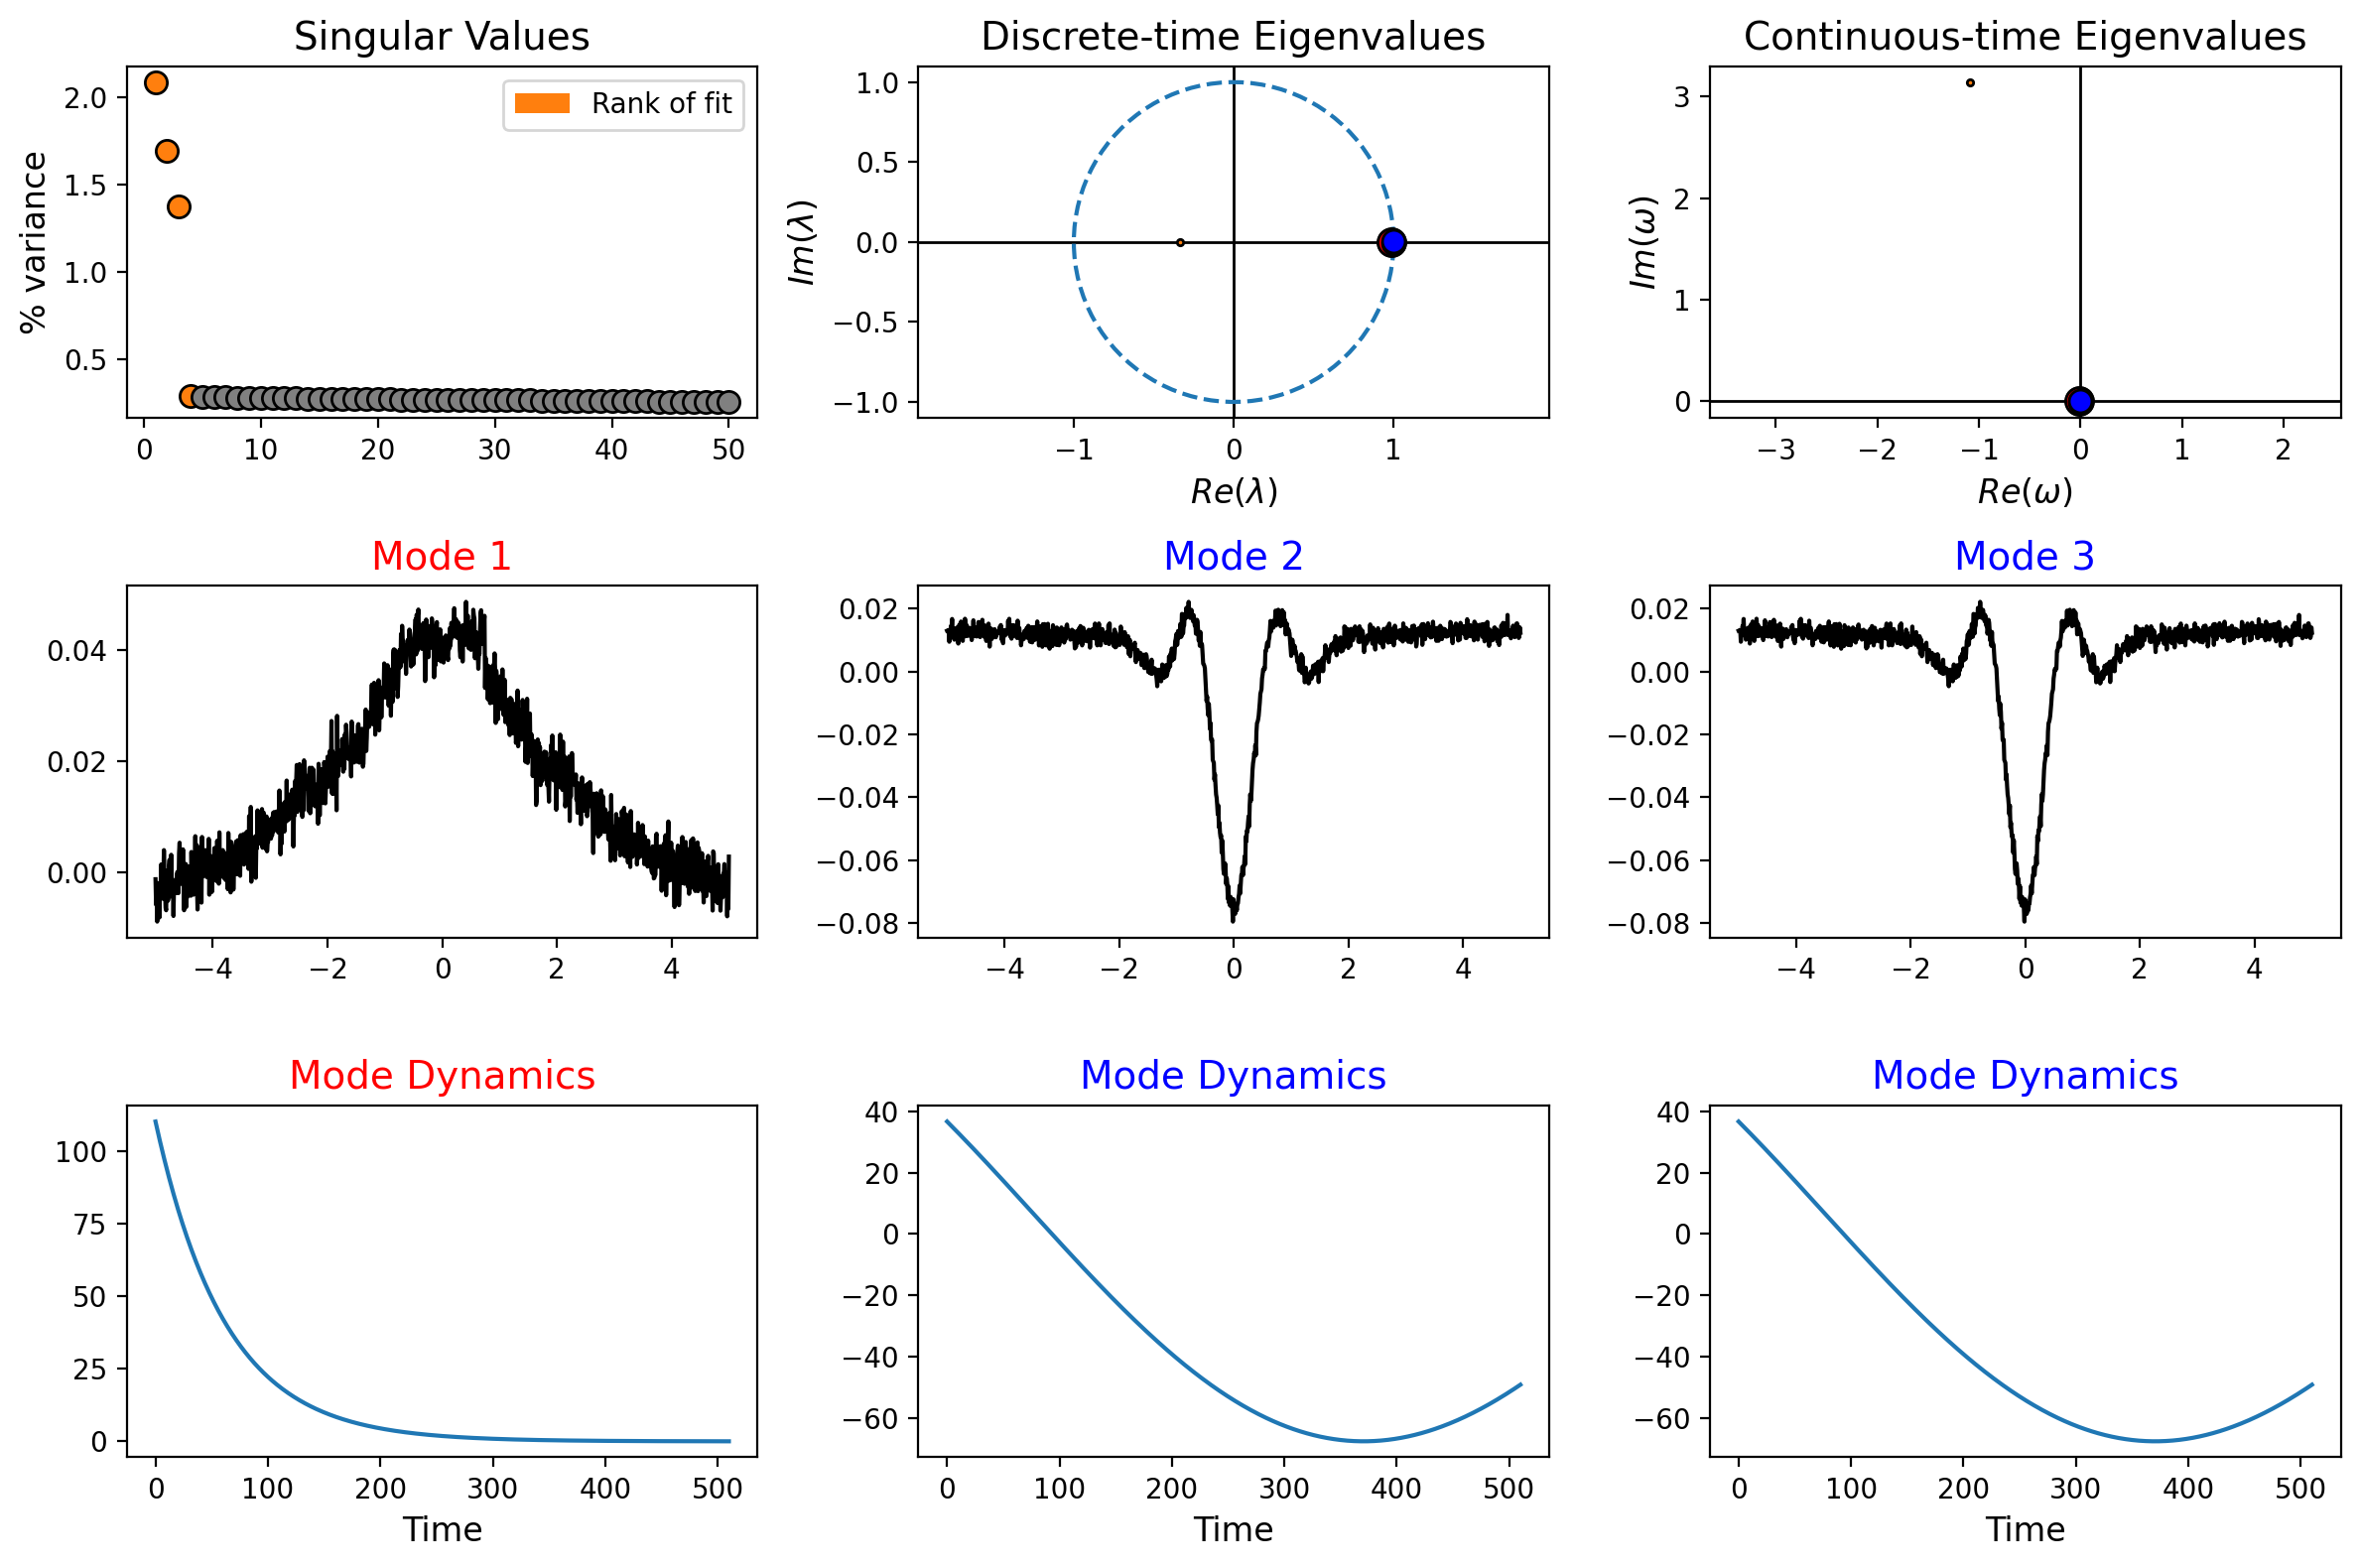

Frequencies (imaginary component):
[-4.41882e+01+127.75j   -6.51100e-01  +0.j     -1.11000e-02  +0.2232j
 -1.11000e-02  -0.2232j]


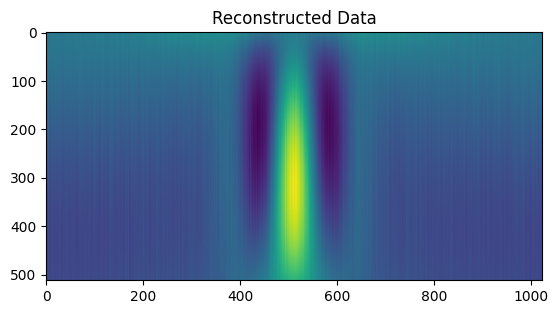

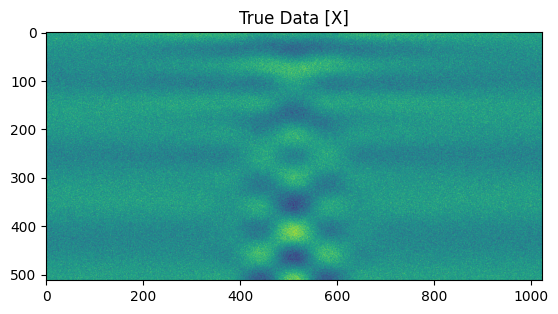

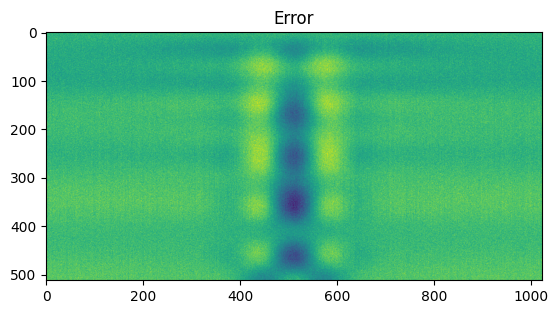

In [92]:
# 5.3
d=2
dmd_5_3 = DMD(svd_rank=4)
delay_dmd_5_3 = hankel_preprocessing(dmd_5_3, d=d)
delay_dmd_5_3.fit(Xn.T)
plot_summary(delay_dmd_5_3, x=x, d=d)

print(
    f"Frequencies (imaginary component):\n"
    f"{np.round(np.log(dmd_5_3.eigs) / dt, decimals=4)}"
)

# Access the reconstructed data from the delay_dmd object, and transpose it to match the shape of X and Xn
X_dmd_5_3 = delay_dmd_5_3.reconstructed_data.T  # Reconstructed data from DMD

# Ensure both X_dmd and Xn have the same dimensions before subtraction
num_rows = min(Xn.shape[0], X_dmd_5_3.shape[0])
num_cols = min(Xn.shape[1], X_dmd_5_3.shape[1])

# Slice both arrays to have the same dimensions
error_5_3 = Xn[:num_rows, :num_cols] - X_dmd_5_3[:num_rows, :num_cols]  # Difference between true and reconstructed data

X_dmd_5_3 = np.real(X_dmd_5_3)
Xn = np.real(Xn)
error_5_3 = np.real(error_5_3)

plt.title("Reconstructed Data")
plt.imshow(X_dmd_5_3[:num_rows, :num_cols]) # Show only the sliced part for consistency
plt.show()
plt.title("True Data [X]")
plt.imshow(Xn[:num_rows, :num_cols]) # Show only the sliced part for consistency
plt.show()
plt.title("Error")
plt.imshow(error_5_3)
plt.show()

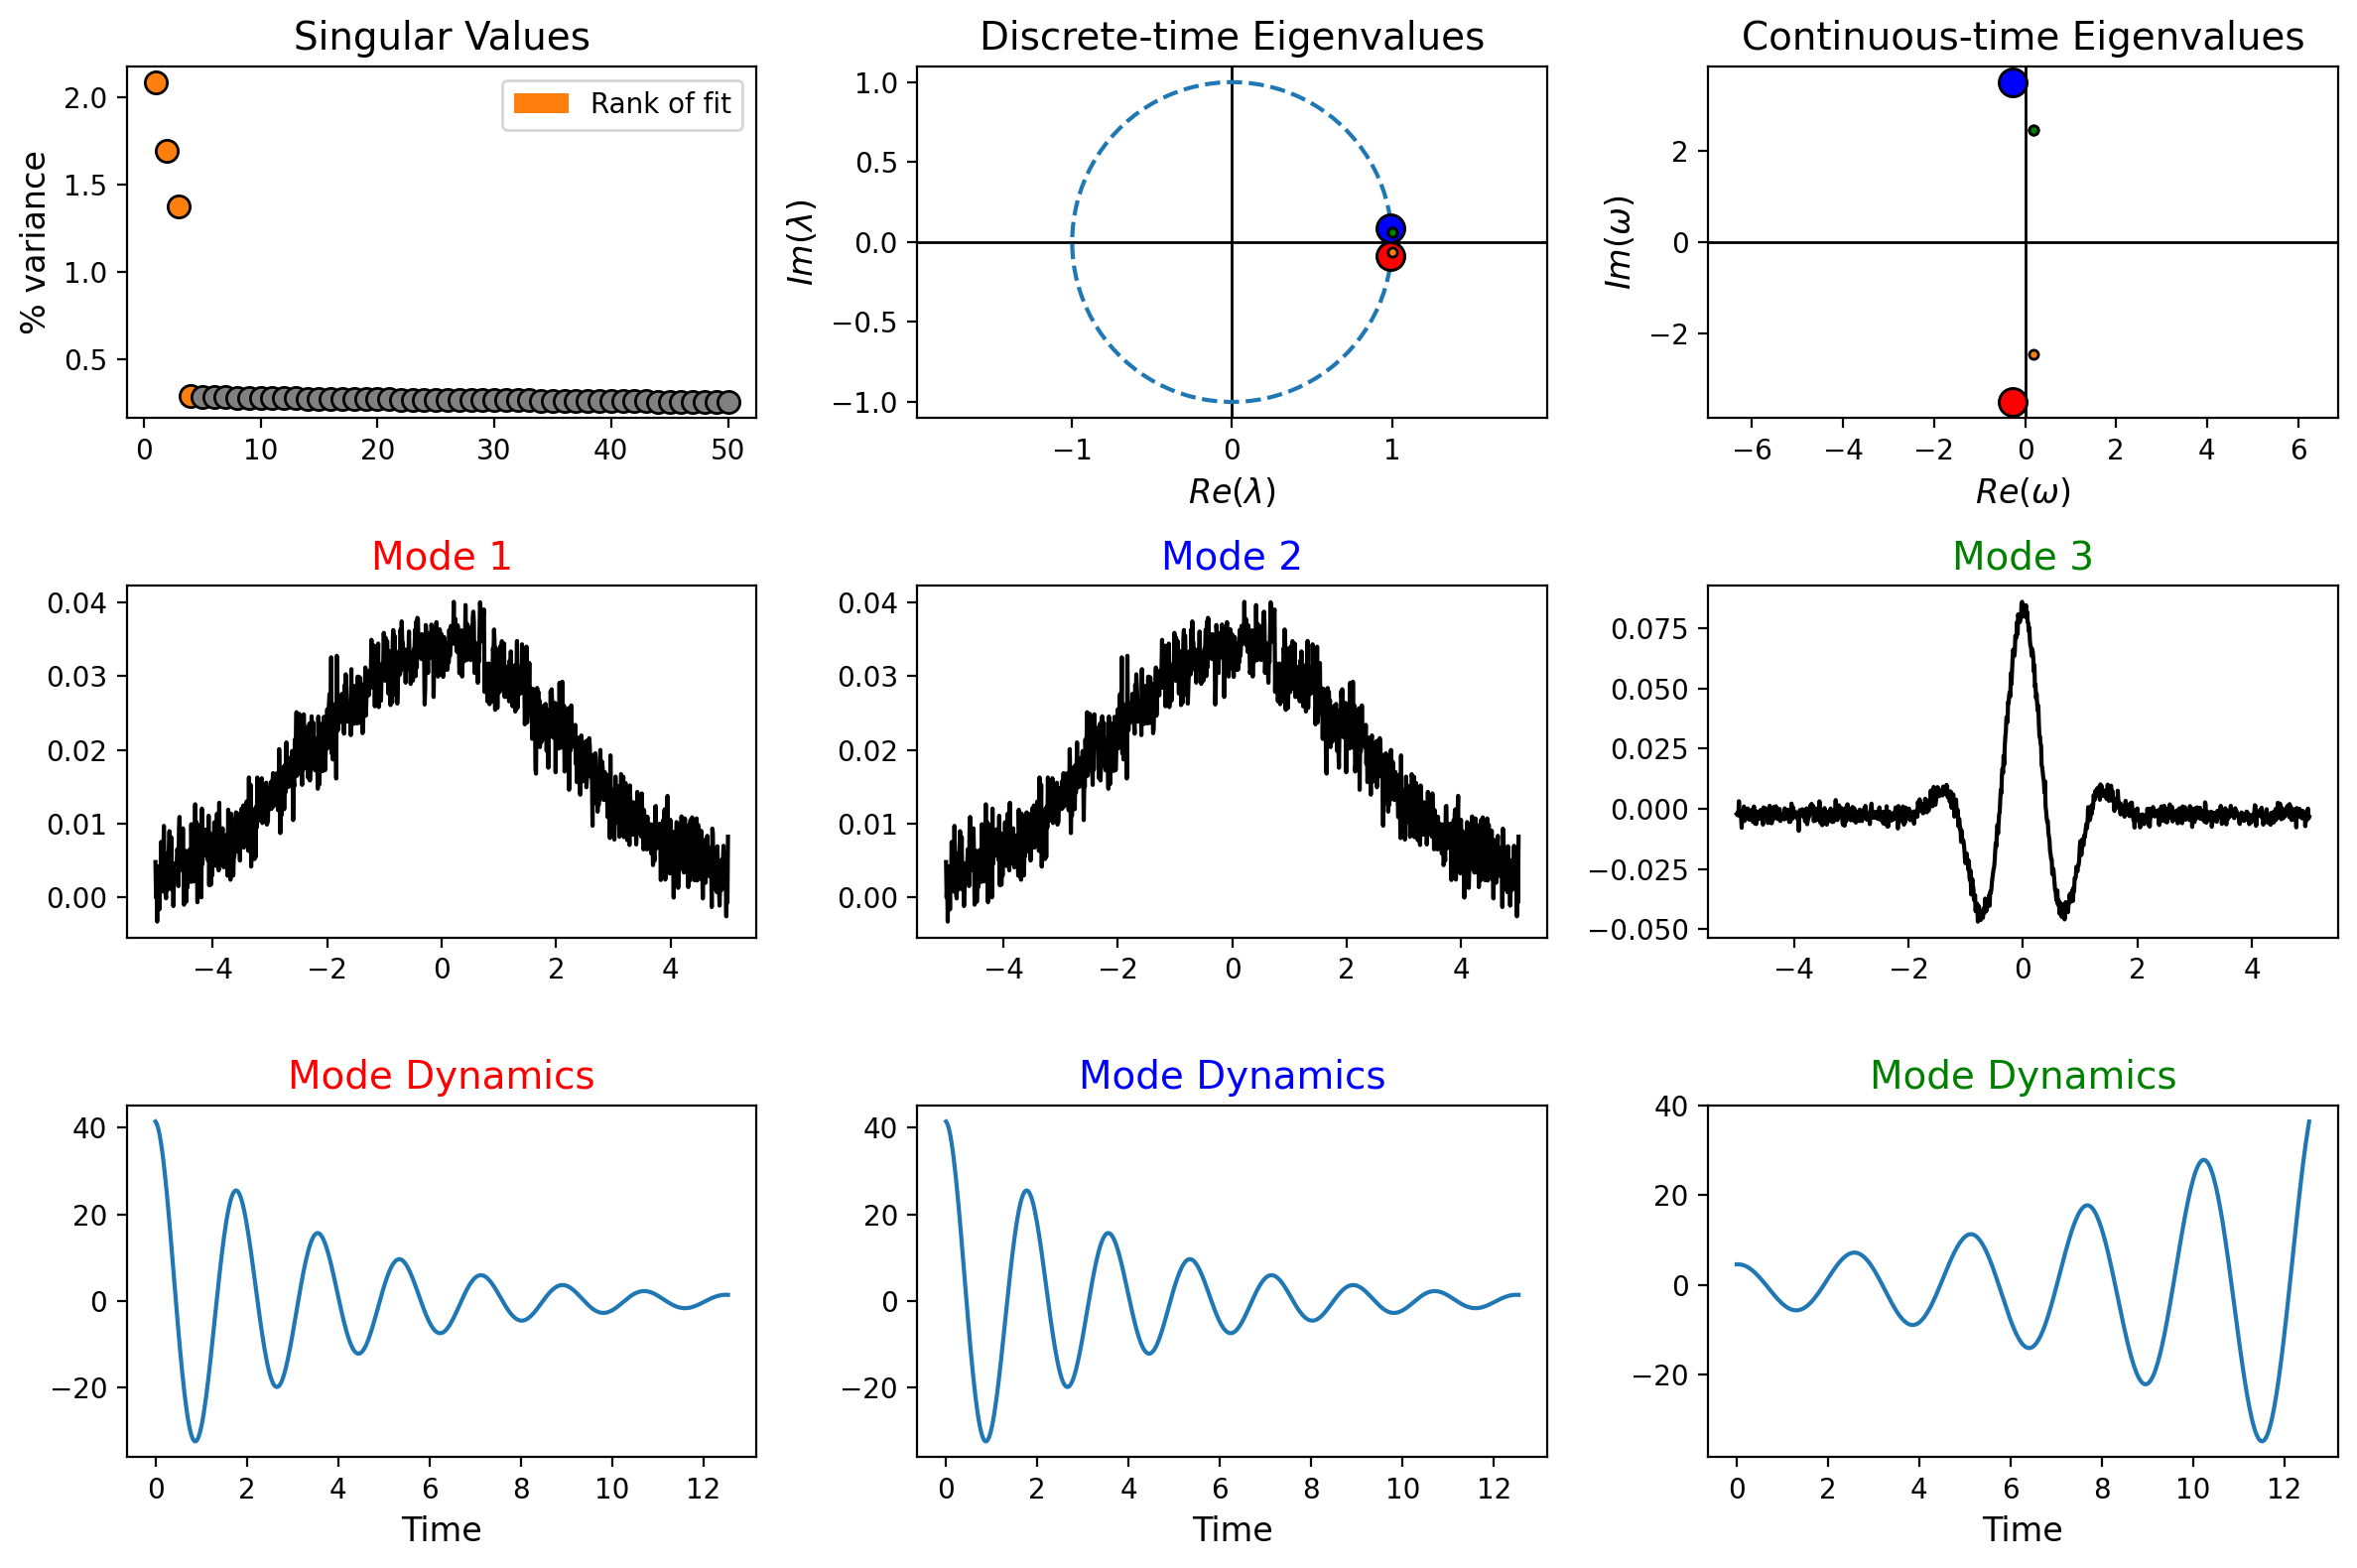

Frequencies (imaginary component):
[51.22995358-67.02993121j 36.75983569-60.95003966j
 36.75983569+60.95003966j 51.22995358+67.02993121j]


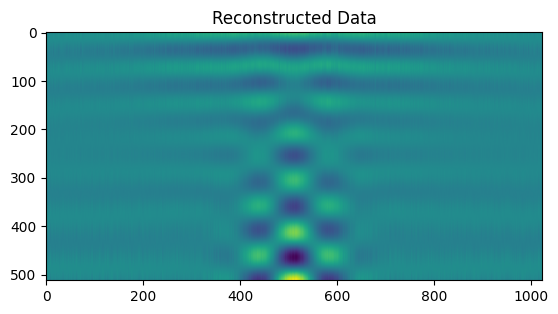

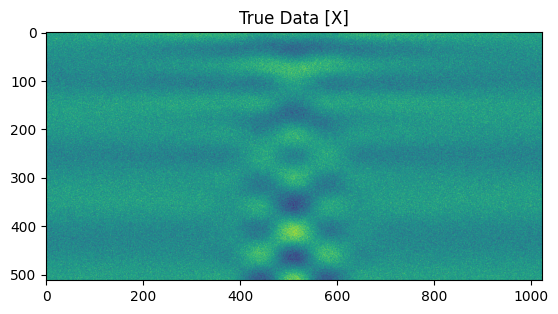

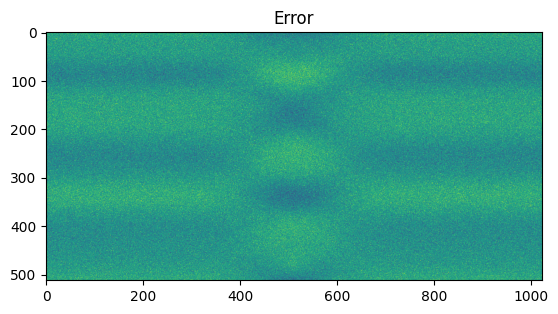

In [72]:
# 5.4
d=2
optdmd = BOPDMD(svd_rank=4, num_trials=2)
# Wrap the model with the preprocessing routine.
delay_optdmd = hankel_preprocessing(optdmd, d=d)

# Fit the model to the noisy data.
# Note: BOPDMD models need the data X and the times of data collection t for fitting.
# Hence if we apply time-delay, we must adjust the length of our time vector accordingly.
delay_t = t[: -d + 1]
delay_optdmd.fit(Xn.T, t=delay_t)

# Plot a summary of the DMD results.
plot_summary(delay_optdmd, x=x, d=d)

# Print computed eigenvalues (frequencies are given by imaginary components).
# Also plot the resulting data reconstruction.
print(
    f"Frequencies (imaginary component):\n"
    f"{np.round(np.log(delay_optdmd.eigs) / dt, decimals=12)}" # Changed delay_dmd to delay_optdmd
)

error_5_4 = Xn - delay_optdmd.reconstructed_data.T

# Removed: delay_optdmd = np.real(delay_optdmd) # This line was causing the error
# Use delay_optdmd.reconstructed_data.real to access the real part if needed.
Xn = np.real(Xn)
error_5_4 = np.real(error_5_4)

plt.title("Reconstructed Data")
plt.imshow(delay_optdmd.reconstructed_data.real.T) # Accessing the real part directly
plt.show()
plt.title("True Data [X]")
plt.imshow(Xn)
plt.show()
plt.title("Error")
plt.imshow(error_5_4)
plt.show()

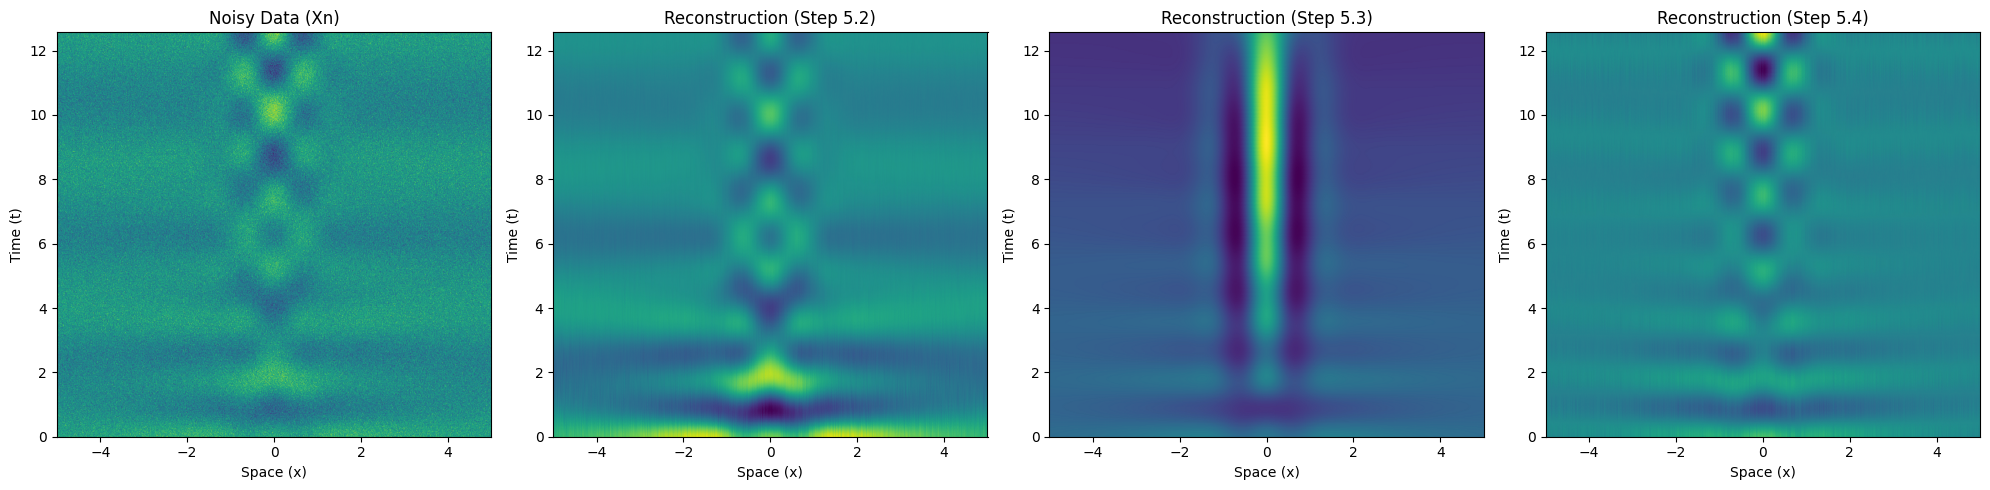

In [87]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot noisy data
axes[0].pcolormesh(xgrid, tgrid, Xn, shading='gouraud', cmap='viridis')
axes[0].set_title('Noisy Data (Xn)')
axes[0].set_xlabel('Space (x)')
axes[0].set_ylabel('Time (t)')

# Plot reconstruction from step 5.2
axes[1].pcolormesh(xgrid, tgrid, X_dmd_5_2, shading='gouraud', cmap='viridis')
axes[1].set_title('Reconstruction (Step 5.2)')
axes[1].set_xlabel('Space (x)')
axes[1].set_ylabel('Time (t)')

# Plot reconstruction from step 5.3
axes[2].pcolormesh(xgrid, tgrid, X_dmd_5_3, shading='gouraud', cmap='viridis')
axes[2].set_title('Reconstruction (Step 5.3)')
axes[2].set_xlabel('Space (x)')
axes[2].set_ylabel('Time (t)')

# Plot reconstruction from step 5.4
axes[3].pcolormesh(xgrid, tgrid, delay_optdmd.reconstructed_data.real.T, shading='gouraud', cmap='viridis')
axes[3].set_title('Reconstruction (Step 5.4)')
axes[3].set_xlabel('Space (x)')
axes[3].set_ylabel('Time (t)')

plt.tight_layout()
plt.show()

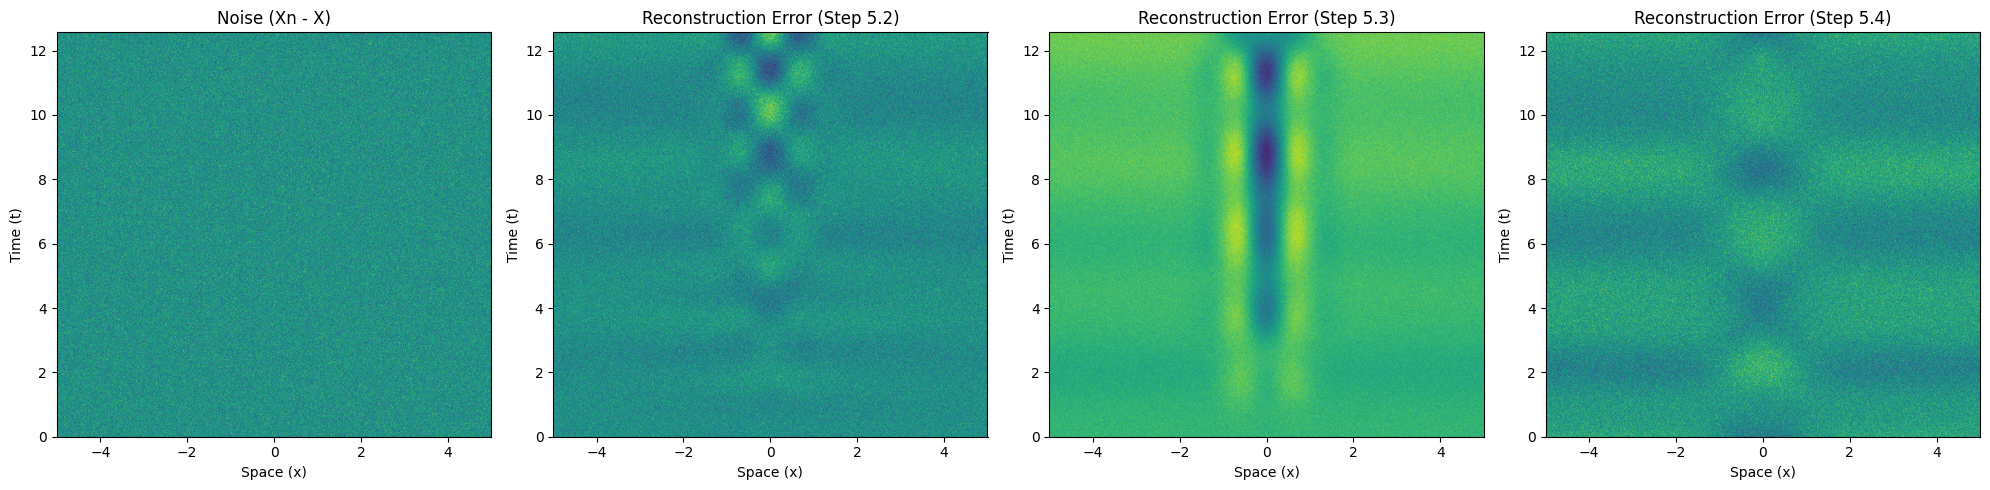

In [88]:
noise = Xn.real - X.real

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot noise
axes[0].pcolormesh(xgrid, tgrid, noise, shading='gouraud', cmap='viridis')
axes[0].set_title('Noise (Xn - X)')
axes[0].set_xlabel('Space (x)')
axes[0].set_ylabel('Time (t)')

# Plot reconstruction error from step 5.2
axes[1].pcolormesh(xgrid, tgrid, error_5_2, shading='gouraud', cmap='viridis')
axes[1].set_title('Reconstruction Error (Step 5.2)')
axes[1].set_xlabel('Space (x)')
axes[1].set_ylabel('Time (t)')

# Plot reconstruction error from step 5.3
axes[2].pcolormesh(xgrid, tgrid, error_5_3, shading='gouraud', cmap='viridis')
axes[2].set_title('Reconstruction Error (Step 5.3)')
axes[2].set_xlabel('Space (x)')
axes[2].set_ylabel('Time (t)')

# Plot reconstruction error from step 5.4
axes[3].pcolormesh(xgrid, tgrid, error_5_4, shading='gouraud', cmap='viridis')
axes[3].set_title('Reconstruction Error (Step 5.4)')
axes[3].set_xlabel('Space (x)')
axes[3].set_ylabel('Time (t)')

plt.tight_layout()
plt.show()

In [89]:
decimals = 4  # Number of decimal places for rounding

# DMD with clean data (X)
frequencies_dmd_clean = np.round(np.log(dmd.eigs) / dt, decimals=decimals)  # Assuming dmd is already fitted to X

# DMD with noisy data (Xn)
frequencies_dmd_noisy = np.round(np.log(dmd.eigs) / dt, decimals=decimals)  # Assuming dmd is already fitted to Xn

# Delayed DMD with noisy data (Xn)
frequencies_delayed_dmd = np.round(np.log(delay_dmd.eigs) / dt, decimals=decimals)  # Assuming delay_dmd is already fitted to Xn

# BOPDMD with noisy data (Xn)
frequencies_bopdmd = np.imag(np.round(delay_optdmd.eigs, decimals=decimals))  # Assuming delay_optdmd is already fitted to Xn

print("Frequencies (imaginary component)")
print(f"DMD ([X] Clean Data): {frequencies_dmd_clean}")
print(f"DMD ([Xn] Noisy Data): {frequencies_dmd_noisy}")
print(f"Delayed DMD ([Xn] Noisy Data): {frequencies_delayed_dmd}")
print(f"BOPDMD ([Xn] Noisy Data): {frequencies_bopdmd}")


Frequencies (imaginary component)
DMD ([X] Clean Data): [-0.2579+3.4508j -0.2579-3.4508j  0.106 +0.2357j  0.106 -0.2357j]
DMD ([Xn] Noisy Data): [-0.2579+3.4508j -0.2579-3.4508j  0.106 +0.2357j  0.106 -0.2357j]
Delayed DMD ([Xn] Noisy Data): [-0.2579+3.4508j -0.2579-3.4508j  0.106 +0.2357j  0.106 -0.2357j]
BOPDMD ([Xn] Noisy Data): [-3.5142 -2.463   2.463   3.5142]


In [90]:
decimals = 4  # Number of decimal places for rounding

# DMD with clean data (X)
growth_rates_dmd_clean = np.round(np.real(np.log(dmd.eigs) / dt), decimals=decimals)

# DMD with noisy data (Xn)
growth_rates_dmd_noisy = np.round(np.real(np.log(dmd.eigs) / dt), decimals=decimals)

# Delayed DMD with noisy data (Xn)
growth_rates_delayed_dmd = np.round(np.real(np.log(delay_dmd.eigs) / dt), decimals=decimals)

# BOPDMD with noisy data (Xn)
growth_rates_bopdmd = np.real(np.round(delay_optdmd.eigs, decimals=decimals))

print("Eigenvalue Growth Rates (real component)")
print(f"DMD ([X] Clean Data): {growth_rates_dmd_clean}")
print(f"DMD ([Xn] Noisy Data): {growth_rates_dmd_noisy}")
print(f"Delayed DMD ([Xn] Noisy Data): {growth_rates_delayed_dmd}")
print(f"BOPDMD ([Xn] Noisy Data): {growth_rates_bopdmd}")

Eigenvalue Growth Rates (real component)
DMD ([X] Clean Data): [-0.2579 -0.2579  0.106   0.106 ]
DMD ([Xn] Noisy Data): [-0.2579 -0.2579  0.106   0.106 ]
Delayed DMD ([Xn] Noisy Data): [-0.2579 -0.2579  0.106   0.106 ]
BOPDMD ([Xn] Noisy Data): [-0.2732  0.1775  0.1775 -0.2732]


6.5) The shapes of the different DMD methods modes vary. The most identical are the exact, realistic, and BOPDMD DMD methods.  The delay method is the most different. This could be due to inacuracies in calculation or an unknown error in the code.

6.6) The mode dynamics of each method vary slightly. The most identical are the exact and realistic. The BOPDMD method is very close but has some differences in the second mode dynamic. The delay method is the most dissimilar. again, this could be due to inacuracies in calculations or an unknown error in the code.

Conclusion: When comparing all of the methods in this assigment, we can see that the levels of accuracy vary. The most accurate is the BOPDMD method when comparing the reconstruction data. The exact DMD is also very accurate. the delay method seems to be the most inacurate. This could be due to calculation errors or an unknown error in the code.